In [7]:
ll# 데이터분석을 위한 pandas, 시각화를 위한 matplotlib, seaborn을 불러옴
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.read_csv(경로): 해당 csv를 읽어와 DataFrame Type으로 변환
# DataFrame명.head() : data의 상단을 보여준다(default는 5)

titanic_df= pd.read_csv('titanic.csv') # csv와 ipynb파일이 같은 폴더내에 있을 때 파일이름 only(상대경로)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# DataFrame명.info() => Data의 개수, null 값의 개수, Data Type 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# DataFrame[원하는 column명].value_counts(): 값의 종류별로 도수를 보여준다
# 0은 사망자, 1은 생존자
titanic_df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

## **데이터 시각화**

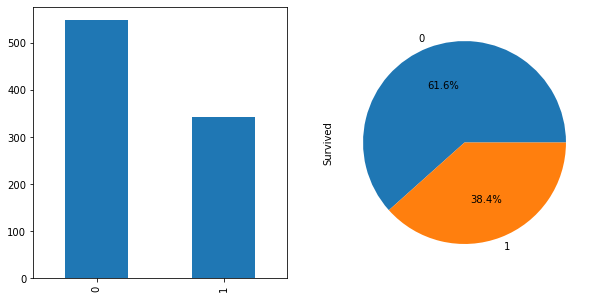

In [19]:
# plt.figure(figsize=(10,5)): 가로 10, 세로 5inch의 백지 생성
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) # 백지를 1행 2열 공간으로 나누고 첫번째 자리에 그래프에 그려준다

titanic_df['Survived'].value_counts().plot(kind='bar') # 막대(bar)그래프

plt.subplot(1,2,2) # 1행 2열로 나뉜 백지의 두번째 자리에 그래프 그려준다

titanic_df["Survived"].value_counts().plot(kind = "pie", autopct='%1.1f%%') # 파이(pie)그래프

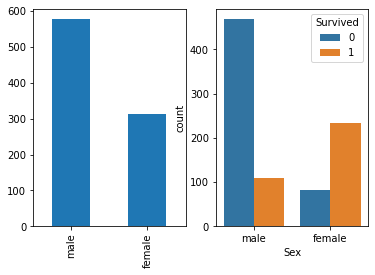

In [13]:
plt.subplot(1,2,1)

# 성별 분포에 대한 막대그래프
titanic_df["Sex"].value_counts().plot(kind = "bar")

plt.subplot(1,2,2)

# 성별에 따른 생존자, 사망자 분포
sns.countplot(data=titanic_df, x="Sex", hue="Survived") 

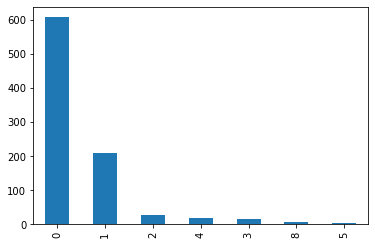

In [11]:
titanic_df["SibSp"].value_counts().plot(kind = "bar")

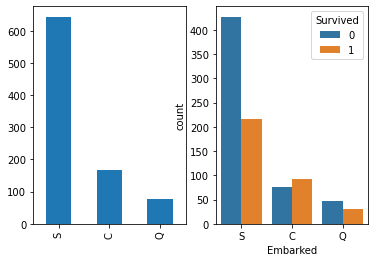

In [9]:
plt.subplot(1,2,1)
titanic_df["Embarked"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
sns.countplot(data=titanic_df, x="Embarked", hue="Survived")

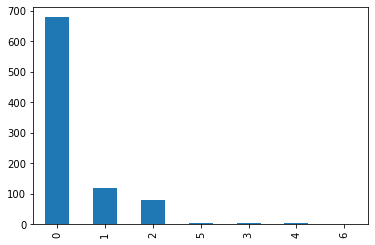

In [20]:
titanic_df["Parch"].value_counts().plot(kind = "bar")

## **결측치 확인**

In [26]:
titanic_df.isnull() 
# null이면 True, not-null이면 False 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
titanic_df.isnull().sum()
# True(숫자 1), False(숫자 0)이므로
# 합계(sum)는 null data의 개수를 나타낸다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Age 결측치 처리**

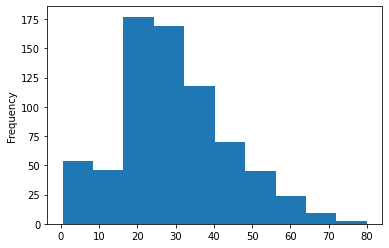

In [24]:
# 결측치 채우기 이전
titanic_df['Age'].plot(kind='hist')

In [48]:
# 결측치 채우기 전
# Age의 값이 null인 data만 조회
age_before = titanic_df[titanic_df['Age'].isnull()]
age_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [8]:
# mean_age: Age의 평균값
mean_age = titanic_df['Age'].mean()
print(mean_age)

29.69911764705882


In [9]:
# fillna(x): x로 null값을 채운다(fill)
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [52]:
titanic_df[titanic_df.index.isin(age_before.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [ ]:
# 결측치 채운 후
# Age의 값이 null이었던 data 조회
titanic_df[titanic_df['Age'].isnull()]

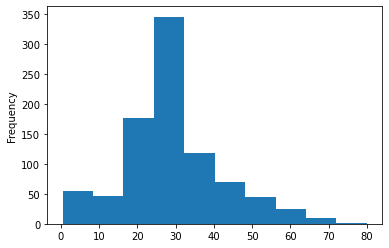

In [31]:
# 결측치 채운 후
titanic_df['Age'].plot(kind='hist')

### **Embarked 결측치 처리**

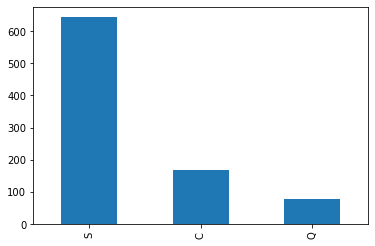

In [32]:
titanic_df["Embarked"].value_counts().plot(kind = "bar")

In [10]:
# 결측치 채우기 전
# Embarked의 값이 null인 data 조회
em_before = titanic_df[titanic_df['Embarked'].isnull()]
em_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [64]:
titanic_df[['Embarked']].mode()

,Embarked
0,S


In [11]:
# 최빈값('S')로 Embarked의 null값 대체
mode_em = titanic_df['Embarked'].mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [12]:
# 결측치 채운 후
# Embarked의 값이 null이었던 data 조회
titanic_df[titanic_df.index.isin(em_before.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [13]:
# FamilySize라는 새로운 변수 column 생성
# 형제, 배우자 수 + 부모, 자식 수 + 1(혼자일 경우 1로 표시)
titanic_df['FamilySize'] = (titanic_df['SibSp'] + titanic_df['Parch'] + 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [14]:
# 'Alone' column 생성하고 값을 0으로 초기화
titanic_df['Alone'] = 0

# FamilySize가 1인 승객들은 Alone 값을 1로 변경
titanic_df.loc[titanic_df['FamilySize'] == 1, 'Alone'] = 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1


## Feature Engineering - 명목변수 인코딩(One hot Encoding)

In [ ]:
x1 = pd.get_dummies(titanic_df['Pclass']) #원핫인코딩 실시
x2 = pd.get_dummies(titanic_df['Sex'])
x3 = pd.get_dummies(titanic_df['Embarked'])

data = pd.concat([titanic_df, x1, x2, x3], axis=1)

In [63]:
x3.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [25]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,1,1,0,0,0,1


## Feature Selection - 변수 선택 및 제외

In [29]:
# 예측에 유용하지 않다고 생각된다면 제외
# 'PassengerId','Name',"Ticket",'Cabin'을 제외하자
drop_cols = ['PassengerId','Name',"Ticket",'Cabin','Survived','Pclass','Sex', 'Embarked']
X = data.drop(drop_cols, axis=1)
y = data['Survived']

In [30]:
X.head(3)

,Age,SibSp,Parch,Fare,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,2,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,2,0,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,1,1,0,0,0,1


In [31]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

## 분류모델정의 - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500) # 임의로 지정(max_iter)

## Cross Validation - 교차검증

In [35]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(lr, X, y, cv = 5)
print(cv)

[0.78212291 0.79213483 0.79775281 0.78089888 0.83146067]


## Train, Test data split - 학습, 테스트 데이터 분리

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (623, 14)
y_train.shape: (623,)
X_test.shape: (268, 14)
y_test.shape: (268,)


## Model Train - 모델 학습

In [39]:
lr.fit(X_train, y_train) # train data 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation - 모델 평가

In [48]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.8059701492537313


In [49]:
y_pred # 승선객들에 대한 생존여부 예측 [0: 사망, 1: 생존]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Other Models - DecisionTree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.7388059701492538


## Other Models - RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.7798507462686567


## Predict - 나의 생존여부 예측

In [51]:
X.head(1) # 필요한 데이터 항목 확인

,Age,SibSp,Parch,Fare,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.25,2,0,0,0,1,0,1,0,0,1


In [56]:
# my data 생성

# Age:23 SibSp: 1 Parch: 2 Fare: 100 FamilySize: 4 Alone: 0 
# Pclass: 2(0,1,0) Sex: male(0,1) Emb: C(1,0,0)

my = [[23, 1, 2, 100, 4, 0, 0, 1, 0, 0, 1, 1, 0, 0]]

In [75]:
pred = lr.predict(my)

if pred:
    print('생존!')
else:
    print('사망.')

사망.
